In [77]:
#!pip install fastai
import pandas as pd
import tensorflow as tf
import re

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

In [78]:
df = pd.read_csv('../data/authors_poems_without_titles.csv')
df['Poems'] = df['Poems'].str.replace('\r', '')

In [79]:
def line_length(lines) :
    return max([len(x.split(' ')) for x in lines])

In [80]:
max_poem_size = df['Poems'].str.split('\n').map(line_length)
df_mod = df[max_poem_size <= 25]

In [81]:
poems = df_mod['Poems'].str.cat(sep='\n')
poems = poems.replace('\r', '')
poems = poems.replace('\n\n', '\n')
poems = poems.replace(',', '')
poems = poems.replace('.', '')
poems = poems.lower()
#print(repr(poems))
#print(poems)

In [82]:
tokenizer = Tokenizer()
corpus = poems.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'que': 1, 'e': 2, 'o': 3, 'a': 4, 'de': 5, 'é': 6, 'não': 7, 'se': 8, 'um': 9, 'do': 10, 'em': 11, 'no': 12, 'me': 13, 'da': 14, 'amor': 15, 'eu': 16, 'com': 17, 'na': 18, 'os': 19, 'uma': 20, 'por': 21, 'sem': 22, 'te': 23, 'as': 24, 'meu': 25, 'para': 26, 'você': 27, 'como': 28, 'mais': 29, 'poeta': 30, 'cerrado': 31, 'ser': 32, 'mas': 33, 'vida': 34, 'quando': 35, 'ao': 36, 'só': 37, 'seu': 38, 'coração': 39, 'poesia': 40, 'nos': 41, 'minha': 42, 'sou': 43, 'dos': 44, 'dia': 45, 'tudo': 46, 'quem': 47, 'ter': 48, 'nem': 49, 'sempre': 50, 'tão': 51, 'pra': 52, 'teu': 53, 'luciano': 54, 'spagnol': 55, 'tem': 56, 'sua': 57, 'já': 58, 'assim': 59, 'são': 60, 'mim': 61, 'meus': 62, 'tempo': 63, 'das': 64, 'poema': 65, 'goiano': 66, 'cada': 67, 'nada': 68, 'mesmo': 69, 'ou': 70, 'olhos': 71, 'onde': 72, 'há': 73, 'amar': 74, 'porque': 75, 'mundo': 76, 'alma': 77, 'nunca': 78, 'dor': 79, 'saudade': 80, 'faz': 81, 'num': 82, 'olhar': 83, 'pois': 84, 'ela': 85, 'quero': 86, '2017': 87, 'bem

In [83]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [85]:
print(tokenizer.word_index['firmamento'])
print(tokenizer.word_index['secas'])
print(tokenizer.word_index['fantasma'])
print(tokenizer.word_index['estrepar'])
print(tokenizer.word_index['afogado'])

2126
3385
3675
3693
3684


In [86]:
print(xs[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [87]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0 1293   51]
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
print(tokenizer.word_index)

In [89]:
print(xs.shape)
print(ys.shape)

(47923, 26)
(47923, 9233)


In [93]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)

Epoch 1/100
1498/1498 [==============================] - 94s 61ms/step - loss: 7.0499 - accuracy: 0.0604
Epoch 2/100
1498/1498 [==============================] - 105s 70ms/step - loss: 6.1102 - accuracy: 0.0990
Epoch 3/100
1498/1498 [==============================] - 101s 68ms/step - loss: 5.3477 - accuracy: 0.1250
Epoch 4/100
1498/1498 [==============================] - 97s 64ms/step - loss: 4.6328 - accuracy: 0.1637
Epoch 5/100
1498/1498 [==============================] - 92s 61ms/step - loss: 4.0847 - accuracy: 0.2081
Epoch 6/100
1498/1498 [==============================] - 109s 73ms/step - loss: 3.7101 - accuracy: 0.2488
Epoch 7/100
1498/1498 [==============================] - 99s 66ms/step - loss: 3.5177 - accuracy: 0.2731
Epoch 8/100
1498/1498 [==============================] - 112s 75ms/step - loss: 3.2965 - accuracy: 0.3002
Epoch 9/100
1498/1498 [==============================] - 100s 67ms/step - loss: 3.1451 - accuracy: 0.3191
Epoch 10/100
1498/1498 [==========================

In [94]:
model.save('trained_model')
model.save('modelHDF5', save_format='h5')

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


In [95]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

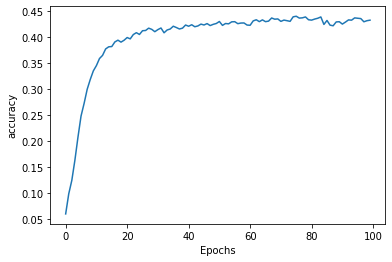

In [96]:
plot_graphs(history, 'accuracy')

In [86]:
def predict_word(seed_text):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predicted_index = np.argmax(predicted, axis=1)[0]
    return predicted_index

In [90]:
seed_text = "Eu te amo tanto"
next_words = 100

for _ in range(next_words):
    predicted_index = predict_word(seed_text)

    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted_index:
            output_word = word
            break
    seed_text += " " + output_word
    prev_word = output_word

In [91]:
seed_list = seed_text.split()
for i, word in enumerate(seed_list):
    i += 1
    if(i % 5 == 0):
        print(word)
    else:
        print(word, end=' ')

Eu te amo tanto nada
certo mais belo da poesia
clamor até para as flores
do seu amor seu par
e come e no coração
amanhecer ou novos caminhos perplexo
lumes enfurecidos agrado prendem us
duro mais u qui pensá
esbater abrace no ar gemido
subverto obro e flores ainda
não realizados neste tenro andor
viver sem poder esperar sebastian
somente perplexo ou passo o
caráter é parede nua galinhas
teia arte das saudades hão
sempre eu lhe dar consolo
sou crua e fria ou
fraqueza céu ou fracasso no
itinerário milho mais fez dia
sonhos laça uivos doidos granel
démodé fogo mais belo 